Осуществим предобработку данных с Твиттера, чтобы отчищенный данные в дальнейшем использовать для задачи классификации. Данный датасет содержит негативные (label = 1) и нейтральные (label = 0) высказывания.
Для работы объединим train_df и test_df.

In [12]:
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}



short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}


emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [31]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('omw-1.4')
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vddav\AppData\Roaming\nltk_data...


In [4]:
train_df = pd.read_csv('train_tweets.csv')
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test_df = pd.read_csv('test_tweets.csv')
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
combine_df = train_df.append(test_df, ignore_index = True, sort = False)
combine_df.head()

C:\Users\vddav\AppData\Local\Temp\ipykernel_2480\595767404.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine_df = train_df.append(test_df, ignore_index = True, sort = False)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [7]:
print(combine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB
None


# EDA

### Гистограмма распределения меток классов

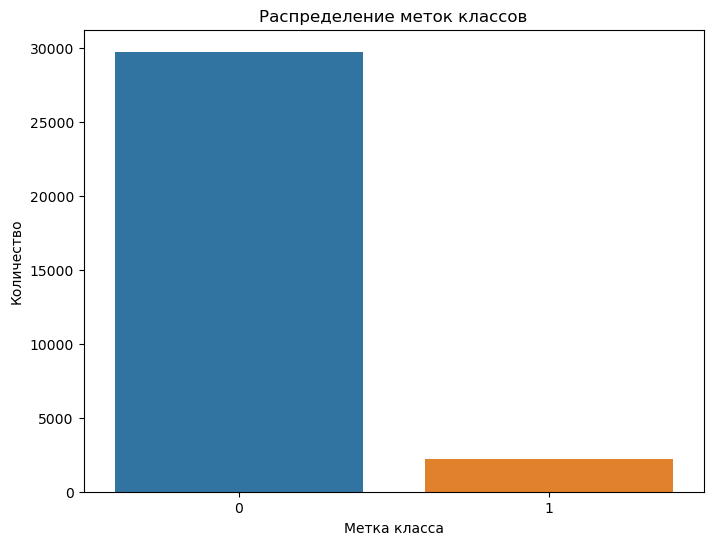

In [34]:
# Подсчет количества каждой метки
label_counts = train_df['label'].value_counts()

# Построение гистограммы
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_df)
plt.title('Распределение меток классов')
plt.xlabel('Метка класса')
plt.ylabel('Количество')
plt.show()

### Облако слов

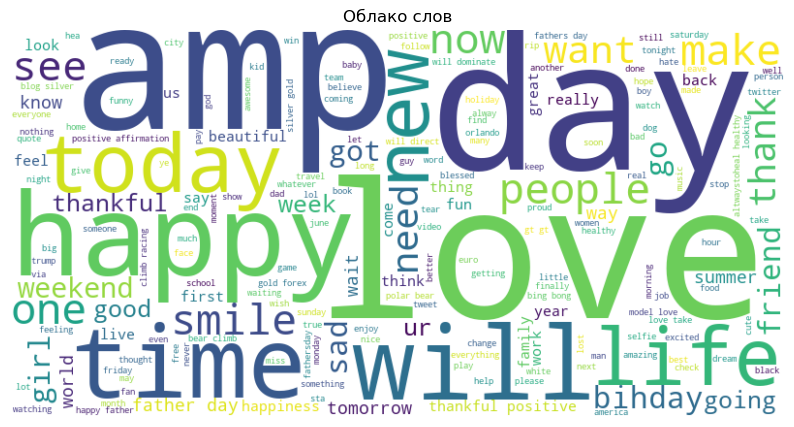

In [39]:
from wordcloud import WordCloud

# Объединим все твиты в одну строку
all_tweets = ' '.join(train_df['tweet'])

# Создадим облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Отобразим облако слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов')
plt.show()

### Сравнение частоты слов для разных классов

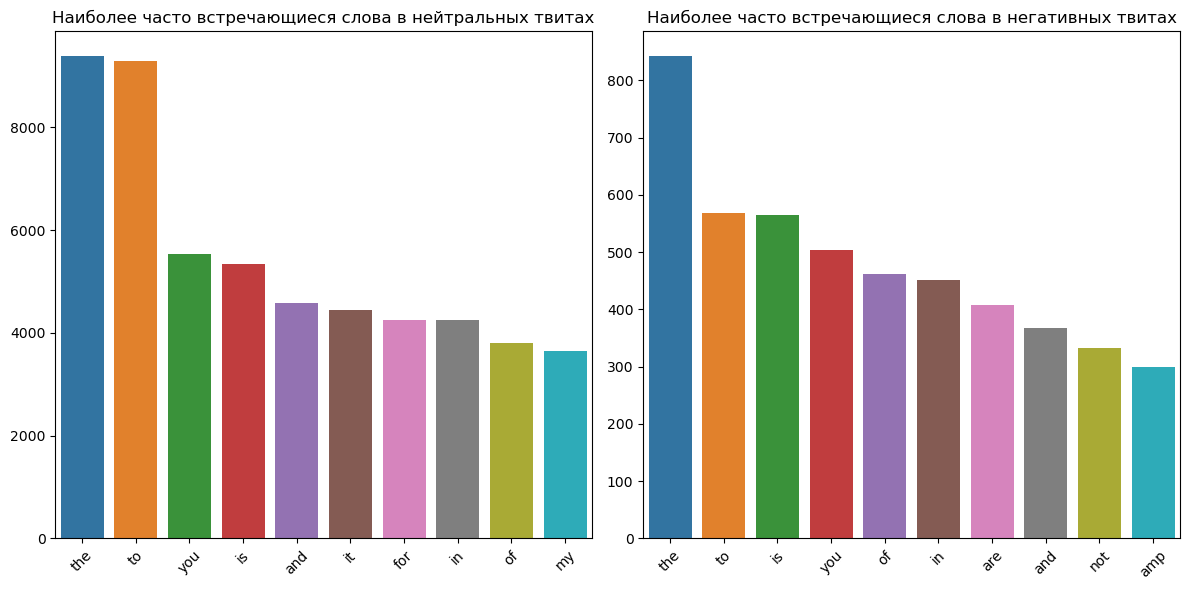

In [40]:
from collections import Counter

# Создадим счетчики слов для каждого класса
neutral_tweets = train_df[train_df['label'] == 0]['tweet'].str.split()
negative_tweets = train_df[train_df['label'] == 1]['tweet'].str.split()

neutral_word_counter = Counter(word for tweet in neutral_tweets for word in tweet)
negative_word_counter = Counter(word for tweet in negative_tweets for word in tweet)

# Наиболее часто встречающиеся слова в каждом классе
most_common_neutral_words = neutral_word_counter.most_common(10)
most_common_negative_words = negative_word_counter.most_common(10)

# Построим графики
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[word[0] for word in most_common_neutral_words], y=[word[1] for word in most_common_neutral_words])
plt.title('Наиболее часто встречающиеся слова в нейтральных твитах')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=[word[0] for word in most_common_negative_words], y=[word[1] for word in most_common_negative_words])
plt.title('Наиболее часто встречающиеся слова в негативных твитах')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Сравнение распределения длины слов для разных классов

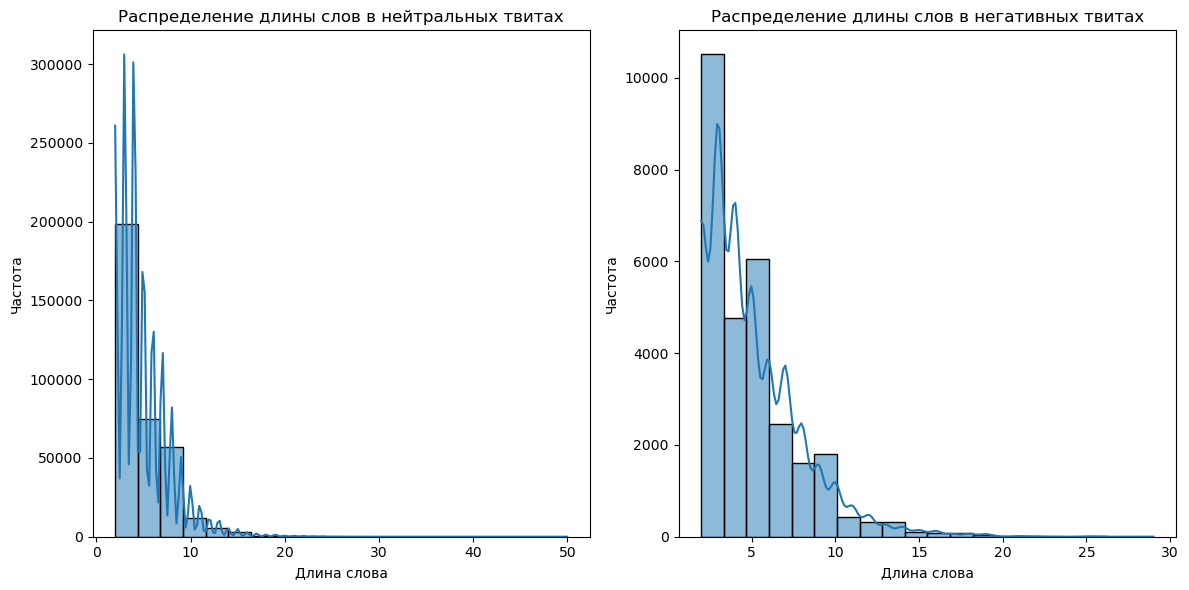

In [41]:
# Распределение длины слов в нейтральных твитах
neutral_tweet_lengths = [len(word) for tweet in neutral_tweets for word in tweet]

# Распределение длины слов в негативных твитах
negative_tweet_lengths = [len(word) for tweet in negative_tweets for word in tweet]

# Построение графиков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(neutral_tweet_lengths, bins=20, kde=True)
plt.title('Распределение длины слов в нейтральных твитах')
plt.xlabel('Длина слова')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(negative_tweet_lengths, bins=20, kde=True)
plt.title('Распределение длины слов в негативных твитах')
plt.xlabel('Длина слова')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

### Длина твитов и распределение длины

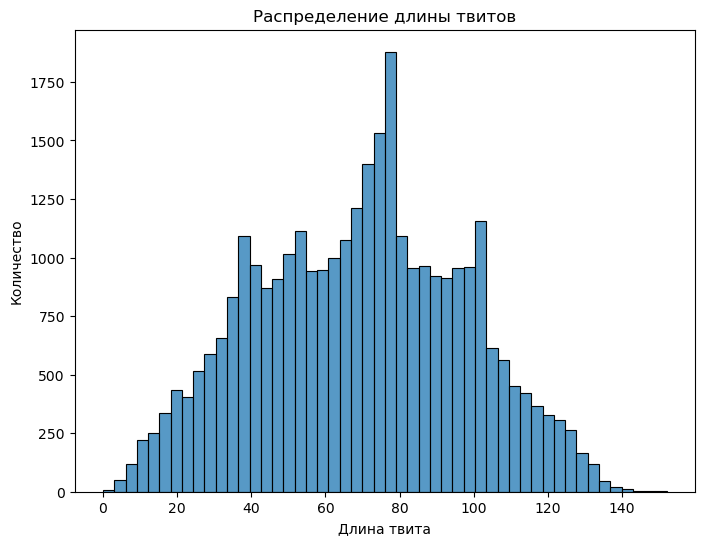

In [35]:
# Подсчет длины каждого твита
train_df['tweet_length'] = train_df['tweet'].apply(len)

# Построение распределения длины твитов
plt.figure(figsize=(8, 6))
sns.histplot(train_df['tweet_length'], bins=50)
plt.title('Распределение длины твитов')
plt.xlabel('Длина твита')
plt.ylabel('Количество')
plt.show()

### Сравнение распределения длины твитов для разных меток классов

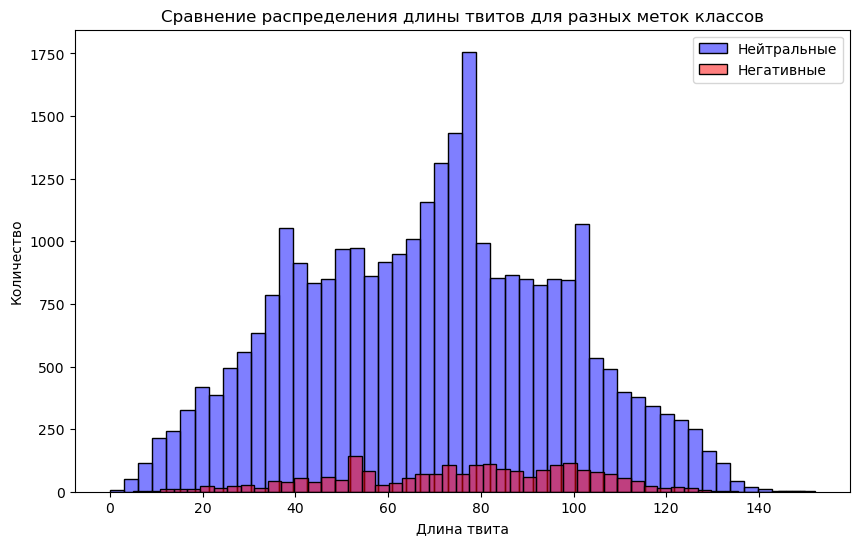

In [36]:
# Построение сравнительного распределения длины твитов для разных меток классов
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['label'] == 0]['tweet_length'], label='Нейтральные', bins=50, color='blue', alpha=0.5)
sns.histplot(train_df[train_df['label'] == 1]['tweet_length'], label='Негативные', bins=50, color='red', alpha=0.5)
plt.title('Сравнение распределения длины твитов для разных меток классов')
plt.xlabel('Длина твита')
plt.ylabel('Количество')
plt.legend()
plt.show()

# Задания

1) Удалим @user из всех твитов с помощью паттерна "@[\w]*". Для этого создадим функцию: 
 - для того, чтобы найти все вхождения паттерна в тексте, необходимо использовать re.findall(pattern, input_txt)
 - для для замены @user на пробел, необходимо использовать re.sub()

In [9]:
# 1) Удалим @user из всех твитов
def remove_user_mentions(tweet):
    return re.sub(r'@[\w]*', '', tweet)

train_df['tweet'] = train_df['tweet'].apply(remove_user_mentions)
test_df['tweet'] = test_df['tweet'].apply(remove_user_mentions)

2) Изменим регистр твитов на нижний с помощью .lower().

In [10]:
# 2) Изменим регистр на нижний
train_df['tweet'] = train_df['tweet'].str.lower()
test_df['tweet'] = test_df['tweet'].str.lower()

3) Заменим сокращения с апострофами (пример: ain't, can't) на пробел, используя apostrophe_dict. Для этого необходимо сделать функцию: для каждого слова в тексте проверить (for word in text.split()), если слово есть в словаре apostrophe_dict в качестве ключа (сокращенного слова), то заменить ключ на значение (полную версию слова).

In [13]:
# 3) Заменим сокращения с апострофами
def replace_apostrophes(text):
    words = text.split()
    for i in range(len(words)):
        if words[i] in apostrophe_dict:
            words[i] = apostrophe_dict[words[i]]
    return ' '.join(words)

train_df['tweet'] = train_df['tweet'].apply(replace_apostrophes)
test_df['tweet'] = test_df['tweet'].apply(replace_apostrophes)

4) Заменим сокращения на их полные формы, используя short_word_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

In [14]:
# 4) Заменим сокращения на полные формы (если есть дополнительные сокращения)

train_df['tweet'] = train_df['tweet'].apply(replace_apostrophes)
test_df['tweet'] = test_df['tweet'].apply(replace_apostrophes)

5) Заменим эмотиконы (пример: ":)" = "happy") на пробелы, используя emoticon_dict. Для этого воспользуемся функцией, используемой в предыдущем пункте.

In [15]:
# 5) Заменим эмотиконы
def replace_emoticons(text):
    words = text.split()
    for i in range(len(words)):
        if words[i] in emoticon_dict:
            words[i] = emoticon_dict[words[i]]
    return ' '.join(words)

train_df['tweet'] = train_df['tweet'].apply(replace_emoticons)
test_df['tweet'] = test_df['tweet'].apply(replace_emoticons)

6) Заменим пунктуацию на пробелы, используя re.sub() и паттерн r'[^\w\s]'.

In [25]:
# 6) Заменим пунктуацию
train_df['tweet'] = train_df['tweet'].str.replace(r'[^\w\s]', ' ', regex=True)
test_df['tweet'] = test_df['tweet'].str.replace(r'[^\w\s]', ' ', regex=True)

7) Заменим спец. символы на пробелы, используя re.sub() и паттерн r'[^a-zA-Z0-9]'.

In [26]:
# 7) Заменим спец. символы
train_df['tweet'] = train_df['tweet'].str.replace(r'[^a-zA-Z0-9]', ' ', regex=True)
test_df['tweet'] = test_df['tweet'].str.replace(r'[^a-zA-Z0-9]', ' ', regex=True)

8) Заменим числа на пробелы, используя re.sub() и паттерн r'[^a-zA-Z]'.

In [27]:
# 8) Заменим числа
train_df['tweet'] = train_df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex=True)
test_df['tweet'] = test_df['tweet'].str.replace(r'[^a-zA-Z]', ' ', regex=True)

9) Удалим из текста слова длиной в 1 символ, используя ' '.join([w for w in x.split() if len(w)>1]).

In [19]:
# 9) Удалим слова длиной в 1 символ
train_df['tweet'] = train_df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))
test_df['tweet'] = test_df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 1]))

10) Поделим твиты на токены с помощью nltk.tokenize.word_tokenize, создав новый столбец 'tweet_token'.

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 10) Поделим твиты на токены с помощью nltk.tokenize.word_tokenize
nltk.download('punkt')
train_df['tweet_token'] = train_df['tweet'].apply(word_tokenize)
test_df['tweet_token'] = test_df['tweet'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vddav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


11) Удалим стоп-слова из токенов, используя nltk.corpus.stopwords. Создадим столбец 'tweet_token_filtered' без стоп-слов.

In [28]:
# 11) Удалим стоп-слова
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

train_df['tweet_token_filtered'] = train_df['tweet_token'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
test_df['tweet_token_filtered'] = test_df['tweet_token'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vddav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


12) Применим стемминг к токенам с помощью nltk.stem.PorterStemmer. Создадим столбец 'tweet_stemmed' после применения стемминга.

In [29]:
# 12) Применим стемминг
stemmer = PorterStemmer()

train_df['tweet_stemmed'] = train_df['tweet_token_filtered'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
test_df['tweet_stemmed'] = test_df['tweet_token_filtered'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

13) Применим лемматизацию к токенам с помощью nltk.stem.wordnet.WordNetLemmatizer. Создадим столбец 'tweet_lemmatized' после применения лемматизации.

In [32]:
# 13) Применим лемматизацию
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

train_df['tweet_lemmatized'] = train_df['tweet_token_filtered'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
test_df['tweet_lemmatized'] = test_df['tweet_token_filtered'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vddav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


14) Сохраним результат предобработки в pickle-файл.

In [33]:
# 14) Сохраним результат предобработки в pickle-файл
import pickle
train_df.to_pickle('preprocessed_train_data.pkl')
test_df.to_pickle('preprocessed_test_data.pkl')